In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [3]:
dataset = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Week7\\USA_Housing.csv")

In [4]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
dataset["Price"] = dataset["Price"].round(0)
dataset["Area Population"] = dataset["Area Population"].round(0)
dataset["Avg. Area Number of Rooms"] = dataset["Avg. Area Number of Rooms"].round(0)
dataset["Avg. Area Income"] = dataset["Avg. Area Income"].round(0)
dataset["Avg. Area House Age"] = dataset["Avg. Area House Age"].round(0)
dataset.drop("Address",inplace=True,axis=1)
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.0,6.0,7.0,4.09,23087.0,1059034.0
1,79249.0,6.0,7.0,3.09,40173.0,1505891.0
2,61287.0,6.0,9.0,5.13,36882.0,1058988.0
3,63345.0,7.0,6.0,3.26,34310.0,1260617.0
4,59982.0,5.0,8.0,4.23,26354.0,630943.0


In [7]:
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

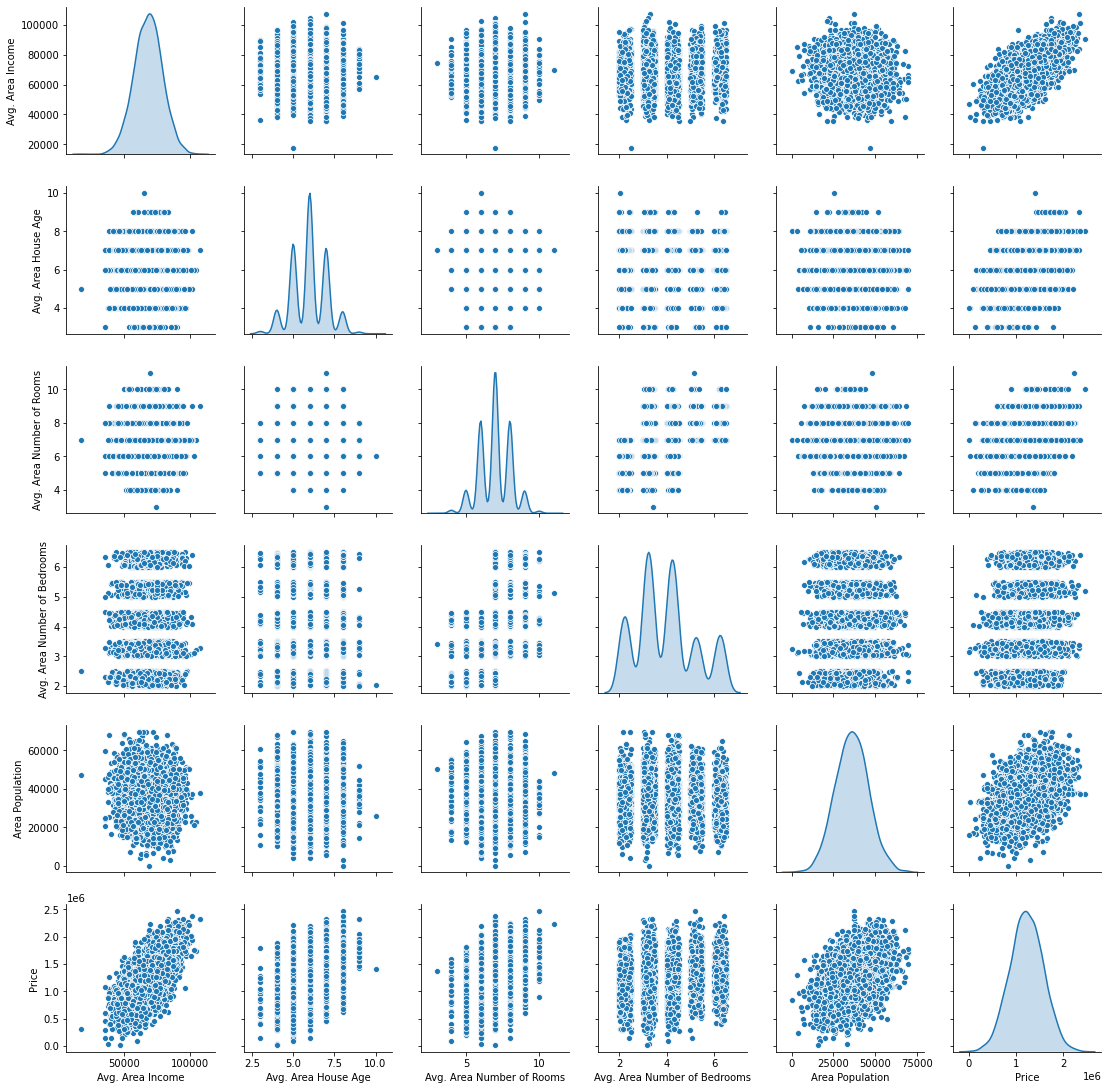

In [8]:
sns.pairplot(dataset,diag_kind="kde")

In [9]:
dataset.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [10]:
X = dataset.drop(['Price'],axis=1)
y = dataset["Price"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
print("The shape of the dataset is {x}".format(x=dataset.shape))
print("The shape of training set is {x}".format(x=X_train.shape))
print("The shape of testing set is {x}".format(x=X_test.shape))


The shape of the dataset is (5000, 6)
The shape of training set is (4000, 5)
The shape of testing set is (1000, 5)


In [13]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)


LinearRegression()

In [14]:
print(regression_model.coef_)
print(regression_model.intercept_.round(2))

[2.15727134e+01 1.51528104e+05 1.07768088e+05 9.25016775e+03
 1.53374282e+01]
-2496622.16


In [16]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx].round(2)))

print("The interception is {x}".format(x=regression_model.intercept_.round(2)))

The coefficient for Avg. Area Income is 21.57
The coefficient for Avg. Area House Age is 151528.1
The coefficient for Avg. Area Number of Rooms is 107768.09
The coefficient for Avg. Area Number of Bedrooms is 9250.17
The coefficient for Area Population is 15.34
The interception is -2496622.16


In [17]:
regression_model.score(X_train, y_train)

0.8912869782976438

In [18]:
y_pred = regression_model.predict(X_test)

In [19]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred.round(0)})
df

,Actual,Predicted
398,894251.0,923315.0
3833,932979.0,914415.0
4836,920748.0,874980.0
4572,691855.0,498633.0
636,732733.0,705846.0
...,...,...
4228,754961.0,840305.0
2367,1205568.0,1231314.0
788,668255.0,476273.0
1452,1398760.0,1233226.0


<function matplotlib.pyplot.show(*args, **kw)>

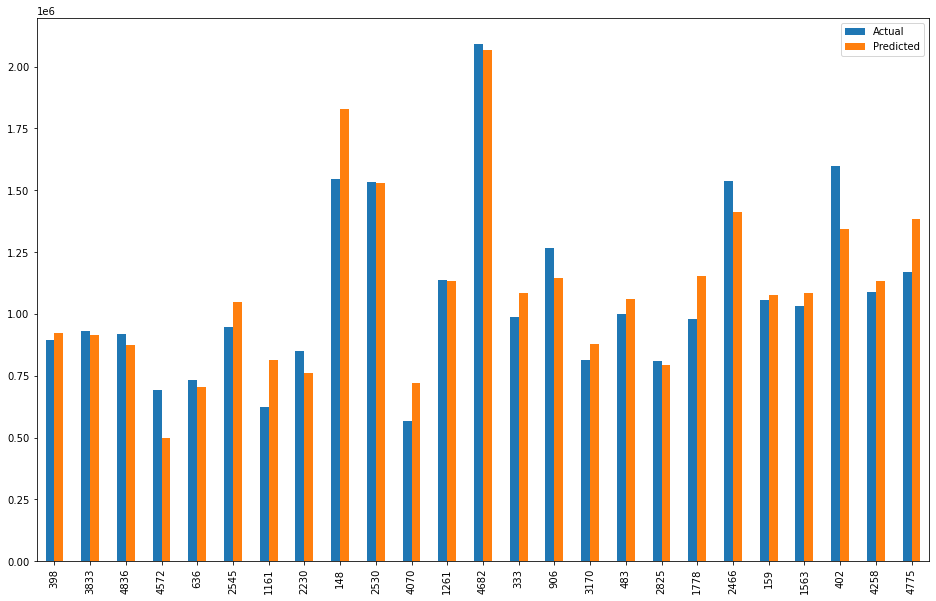

In [20]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.show

In [21]:
regression_model.score(X_train, y_train)

0.8912869782976438

In [22]:
regression_model.score(X_test, y_test)

0.8956846557342152

In [23]:
#Adding Interactive terms
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

print(poly_clf.score(X_train2, y_train))

0.8915671539050007


In [24]:
print(poly_clf.score(X_test2, y_test))
#It didn't help to increase R^2 :/

0.8954337897457857
